In [2]:
import glob
import pandas as pd
import os

In [3]:
#Constructing the paths to the Data

# Construct the path to the 'Real' folder in the centralized 'Data' directory
real_folder_path = os.path.join("..", "Data", "Real")
# Use glob to get all txt files in the 'Real' folder
files_real = glob.glob(os.path.join(real_folder_path, "*.txt"))

# Construct the path to the 'Surrogate' folder in the centralized 'Data' directory
random_folder_path = os.path.join("..", "Data", "Surrogate")
# Use glob to get all txt files in the 'Real' folder
files_random = glob.glob(os.path.join(random_folder_path, "*.csv"))



In [4]:
#openening real files
pd_real=[pd.read_csv(file,sep=' ') for file in files_real]

In [5]:
#Opening randomized files
pd_random=[pd.read_csv(file,index_col=0) for file in files_random]

In [6]:
## For the next version, I should clean the data in advance and only upload the right ones
# List of columns
columns = ['Joint Ent', 'Mut Info', 'Total Corr', 'Oinfo', 'Sinfo', 'nplets']

# We are going to drop the nplets columns so that we are able to average it from scratch
#Initialize an empty list to store the new DataFrames
new_pd_real = []

# Iterate over each DataFrame in your list
for df in pd_real:
    # Drop 'nplets.1' column
    df = df.drop('nplets.1', axis=1)
    
    # Reorder the DataFrame columns
    df = df[columns]
    
    # Append the new DataFrame to the list
    new_pd_real.append(df)


In [7]:
nplets=new_pd_real[0]['nplets']

In [8]:
#Computing zscores
# Assuming you have a list of DataFrames called real_no_nplets
real_no_nplets=[df.drop('nplets', axis=1) for df in new_pd_real]
# Loop through each DataFrame in the list
for df in real_no_nplets:
    # Loop through each column (except the last one)
    for column in df.columns:#[:-1]:
        # Compute the Z-scores and store them in a new column
        zscore_column = column + '_zscore'
        df[zscore_column] = (df[column] - df[column].mean()) / df[column].std()

# Now, each DataFrame in new_pd_real contains additional columns with Z-scores
average_df = pd.concat([df for df in real_no_nplets]).groupby(level=0).mean()
average_df['nplets']=nplets.to_list()

In [9]:
# Loop through each DataFrame in the list
# The same for random triplets
random_no_nplets=[df.drop('nplets', axis=1) for df in pd_random]
for df in random_no_nplets:
    # Loop through each column (except the last one)
    for column in df.columns:#[:-1]:
        # Compute the Z-scores and store them in a new column
        zscore_column = column + '_zscore'
        df[zscore_column] = (df[column] - df[column].mean()) / df[column].std()

# Now, each DataFrame in new_pd_real contains additional columns with Z-scores
average_df_random = pd.concat([df for df in random_no_nplets]).groupby(level=0).mean()
average_df_random['nplets']=nplets.to_list()

In [10]:
#Saving the average DataFrame as csv
average_df.to_csv('average_triplets.csv')
average_df_random.to_csv('average_triplets_random.csv')

In [11]:
average_df

,Joint Ent,Mut Info,Total Corr,Oinfo,Sinfo,Joint Ent_zscore,Mut Info_zscore,Total Corr_zscore,Oinfo_zscore,Sinfo_zscore,nplets
0,8.923628,-0.557076,1.274209,0.020014,0.342425,-0.310860,0.183192,-0.348008,0.102300,-0.016950,"[1, 2, 3]"
1,8.932821,-0.541286,1.330216,0.029548,0.416118,-0.283423,0.280912,-0.067102,0.386240,0.221793,"[1, 2, 4]"
2,8.992595,-0.597054,1.231493,0.011506,0.237820,-0.050201,-0.078853,-0.563352,-0.132155,-0.388671,"[1, 2, 5]"
3,9.039250,-0.605335,1.262616,0.017158,0.249755,0.161077,-0.144745,-0.421705,0.056525,-0.367873,"[1, 2, 6]"
4,9.055182,-0.629572,1.240336,0.010714,0.183886,0.215062,-0.304250,-0.548515,-0.171957,-0.601101,"[1, 2, 7]"
...,...,...,...,...,...,...,...,...,...,...,...
125575,9.097848,-0.650263,1.195874,0.005098,0.115138,0.330909,-0.469557,-0.759711,-0.349053,-0.826697,"[88, 91, 92]"
125576,9.009272,-0.594000,1.174629,0.004095,0.185121,-0.067733,-0.067155,-0.867205,-0.350785,-0.581352,"[89, 90, 91]"
125577,9.044079,-0.623080,1.142707,0.002675,0.093712,0.091260,-0.253642,-1.014337,-0.370162,-0.873360,"[89, 90, 92]"
125578,9.077379,-0.646575,1.158529,0.002782,0.073662,0.251667,-0.432491,-0.926272,-0.372589,-0.950562,"[89, 91, 92]"


In [12]:
average_df_random

,Oinfo,Sinfo,Joint Ent,Mut Info,Total Corr,Oinfo_zscore,Sinfo_zscore,Joint Ent_zscore,Mut Info_zscore,Total Corr_zscore,nplets
0,-0.000008,0.005409,9.415800,-0.839789,1.341186,-0.086610,-0.388805,-0.172038,0.130098,-0.281661,"[1, 2, 3]"
1,0.000011,0.006520,9.421011,-0.841902,1.351205,0.002001,-0.314438,-0.126056,0.113574,-0.195606,"[1, 2, 4]"
2,0.000010,0.003341,9.417715,-0.841681,1.344997,0.000321,-0.550902,-0.144954,0.106293,-0.248396,"[1, 2, 5]"
3,0.000012,0.005481,9.412249,-0.843384,1.353651,0.029677,-0.389968,-0.221359,0.088398,-0.169639,"[1, 2, 6]"
4,0.000025,0.005774,9.418516,-0.835224,1.344382,0.051920,-0.351952,-0.113901,0.174379,-0.238001,"[1, 2, 7]"
...,...,...,...,...,...,...,...,...,...,...,...
125575,0.000006,0.002272,9.405604,-0.834047,1.334998,-0.004440,-0.638048,-0.284925,0.203682,-0.336733,"[88, 91, 92]"
125576,0.000006,0.001932,9.411482,-0.833696,1.333949,-0.024047,-0.661543,-0.199219,0.199251,-0.337796,"[89, 90, 91]"
125577,-0.000005,0.002323,9.411278,-0.827273,1.329267,-0.039748,-0.626452,-0.207855,0.283034,-0.382501,"[89, 90, 92]"
125578,-0.000007,0.001470,9.406365,-0.827091,1.327524,-0.060476,-0.693550,-0.264874,0.286303,-0.400296,"[89, 91, 92]"


<ipython-input-13-5eac15ba9435>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


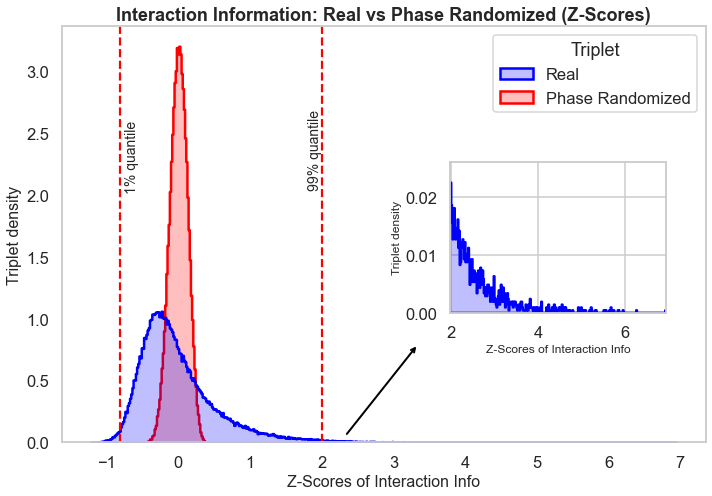

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have DataFrames named average_df and average_df_random

# Combine the two DataFrames and add a 'Triplet' column to distinguish between them
average_df['Triplet'] = 'Real'
average_df_random['Triplet'] = 'Phase Randomized'
combined_df = pd.concat([average_df, average_df_random])

# Plot styling
sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(10, 7))

# Main plot
sns.histplot(data=combined_df, x='Mut Info_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax, bins=500, palette={"Phase Randomized": "red", "Real": "blue"})
ax.set_title('Interaction Information: Real vs Phase Randomized (Z-Scores)', fontsize=18, weight='bold')
ax.set_xlabel('Z-Scores of Interaction Info', fontsize=16)
ax.set_ylabel('Triplet density', fontsize=16)

# Remove the grid
ax.grid(False)

# Quantile lines for 'Real' only
q1 = average_df['Mut Info_zscore'].quantile(0.01)
q99 = average_df['Mut Info_zscore'].quantile(0.99)
ax.axvline(q1, color='red', linestyle='dashed', linewidth=2.2)
ax.axvline(q99, color='red', linestyle='dashed', linewidth=2.2)
ax.annotate('1% quantile', xy=(q1, 0.02), xytext=(0.92*q1, 0.775*ax.get_ylim()[1]), horizontalalignment='left', verticalalignment='top', rotation=90, fontsize=14)
ax.annotate('99% quantile', xy=(q99, 0.02), xytext=(q99, 0.8*ax.get_ylim()[1]), horizontalalignment='right', verticalalignment='top', rotation=90, fontsize=14)

# Inset axes with data from the entire dataset (for the same column)
ax_inset = fig.add_axes([0.63, 0.37, 0.3, 0.3])
sns.histplot(data=combined_df, x='Mut Info_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax_inset, bins=500, legend=False, palette={"Phase Randomized": "red", "Real": "blue"})

# Set the y-axis limit in the inset to match the density of the full column
density_max = max(average_df['Mut Info_zscore'].max(), average_df_random['Mut Info_zscore'].max())
ax_inset.set_ylim(0, 0.026)

ax_inset.set_xlim(0.98*q99, density_max)
ax_inset.set_xlabel('Z-Scores of Interaction Info', fontsize=12)
ax_inset.set_ylabel('Triplet density', fontsize=12)

# Draw an arrow from the main plot to the inset
arrow_start = (0.48, 0.12)
arrow_end = (0.58, 0.3)
ax.annotate('', xy=arrow_end, xycoords='figure fraction', xytext=arrow_start, textcoords='figure fraction',
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

#ax.tick_params(axis='y', labelsize=12)  # Adjust 'labelsize' as needed for the desired font size
#ax_inset.tick_params(axis='y', labelsize=10)  # Adjust 'labelsize' as needed for the desired font size
#ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust 'nbins' for the number of desired y-labels
#ax_inset.yaxis.set_major_locator(plt.MaxNLocator(nbins=3))  # Adjust 'nbins' for the number of desired y-labels

# Save and show plot
plt.tight_layout()
plt.savefig('real_vs_random_zscores.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-14-8f9289947e75>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


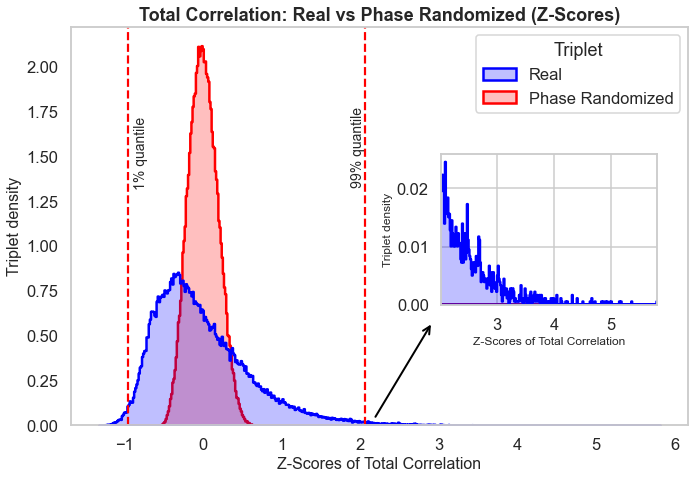

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have DataFrames named average_df and average_df_random

# Combine the two DataFrames and add a 'Triplet' column to distinguish between them
average_df['Triplet'] = 'Real'
average_df_random['Triplet'] = 'Phase Randomized'
combined_df = pd.concat([average_df, average_df_random])

# Plot styling
sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(10, 7))

# Main plot
sns.histplot(data=combined_df, x='Total Corr_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax, bins=500, palette={"Phase Randomized": "red", "Real": "blue"})
ax.set_title('Total Correlation: Real vs Phase Randomized (Z-Scores)', fontsize=18, weight='bold')
ax.set_xlabel('Z-Scores of Total Correlation', fontsize=16)
ax.set_ylabel('Triplet density', fontsize=16)

# Remove the grid
ax.grid(False)

# Quantile lines for 'Real' only
q1 = average_df['Total Corr_zscore'].quantile(0.01)
q99 = average_df['Total Corr_zscore'].quantile(0.99)
ax.axvline(q1, color='red', linestyle='dashed', linewidth=2.2)
ax.axvline(q99, color='red', linestyle='dashed', linewidth=2.2)
ax.annotate('1% quantile', xy=(q1, 0.02), xytext=(0.92*q1, 0.775*ax.get_ylim()[1]), horizontalalignment='left', verticalalignment='top', rotation=90, fontsize=14)
ax.annotate('99% quantile', xy=(q99, 0.02), xytext=(q99, 0.8*ax.get_ylim()[1]), horizontalalignment='right', verticalalignment='top', rotation=90, fontsize=14)

# Inset axes with data from the entire dataset (for the same column)
ax_inset = fig.add_axes([0.63, 0.37, 0.3, 0.3])
sns.histplot(data=combined_df, x='Total Corr_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax_inset, bins=500, legend=False, palette={"Phase Randomized": "red", "Real": "blue"})

# Set the y-axis limit in the inset to match the density of the full column
density_max = max(average_df['Total Corr_zscore'].max(), average_df_random['Mut Info_zscore'].max())
ax_inset.set_ylim(0, 0.026)

ax_inset.set_xlim(0.98*q99, density_max)
ax_inset.set_xlabel('Z-Scores of Total Correlation', fontsize=12)
ax_inset.set_ylabel('Triplet density', fontsize=12)

# Draw an arrow from the main plot to the inset
arrow_start = (0.52, 0.12)
arrow_end = (0.6, 0.31)
ax.annotate('', xy=arrow_end, xycoords='figure fraction', xytext=arrow_start, textcoords='figure fraction',
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

#ax.tick_params(axis='y', labelsize=12)  # Adjust 'labelsize' as needed for the desired font size
#ax_inset.tick_params(axis='y', labelsize=10)  # Adjust 'labelsize' as needed for the desired font size
#ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust 'nbins' for the number of desired y-labels
#ax_inset.yaxis.set_major_locator(plt.MaxNLocator(nbins=3))  # Adjust 'nbins' for the number of desired y-labels

# Save and show plot
plt.tight_layout()
plt.savefig('real_vs_random_zscores_tot_corr.png', dpi=300, bbox_inches='tight')
plt.show()


<ipython-input-15-dcc881831ee4>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


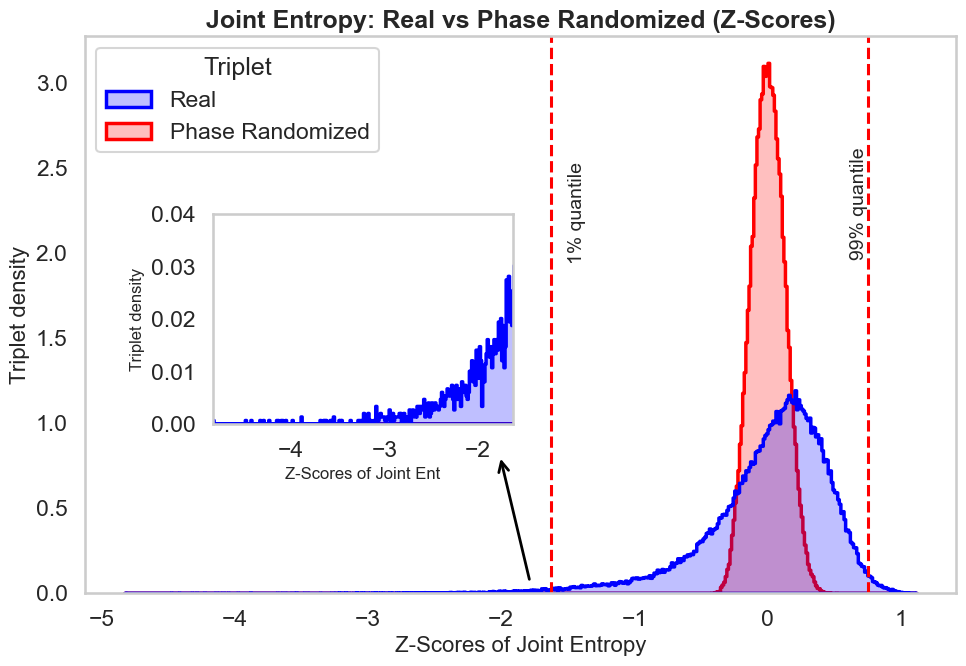

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
plt.rcdefaults()
# Assuming you have DataFrames named average_df and average_df_random

# Combine the two DataFrames and add a 'Triplet' column to distinguish between them
average_df['Triplet'] = 'Real'
average_df_random['Triplet'] = 'Phase Randomized'
combined_df = pd.concat([average_df, average_df_random])

# Plot styling
sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(10, 7))

# Main plot
sns.histplot(data=combined_df, x='Joint Ent_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax, bins=500, palette={"Phase Randomized": "red", "Real": "blue"})
ax.set_title('Joint Entropy: Real vs Phase Randomized (Z-Scores)', fontsize=18, weight='bold')
ax.set_xlabel('Z-Scores of Joint Entropy', fontsize=16)
ax.set_ylabel('Triplet density', fontsize=16)

# Quantile lines for 'Real' only
q1 = average_df['Joint Ent_zscore'].quantile(0.01)
q99 = average_df['Joint Ent_zscore'].quantile(0.99)
ax.axvline(q1, color='red', linestyle='dashed', linewidth=2.2)
ax.axvline(q99, color='red', linestyle='dashed', linewidth=2.2)
ax.annotate('1% quantile', xy=(q1, 0.02), xytext=(0.92*q1, 0.775*ax.get_ylim()[1]), horizontalalignment='left', verticalalignment='top', rotation=90, fontsize=14)
ax.annotate('99% quantile', xy=(q99, 0.02), xytext=(q99, 0.8*ax.get_ylim()[1]), horizontalalignment='right', verticalalignment='top', rotation=90, fontsize=14)

# Inset axes with data from the entire dataset (for the same column)
ax_inset = fig.add_axes([0.23, 0.37, 0.3, 0.3])
sns.histplot(data=combined_df, x='Joint Ent_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax_inset, bins=500, legend=False, palette={"Phase Randomized": "red", "Real": "blue"})

# Set the y-axis limit in the inset to match the density of the full column
ax_inset.set_ylim(0.00, 0.04)

ax_inset.set_xlim(combined_df['Joint Ent_zscore'].min(),q1)# combined_df['Joint Ent_zscore'].max())
ax_inset.set_xlabel('Z-Scores of Joint Ent', fontsize=12)
ax_inset.set_ylabel('Triplet density', fontsize=12)
ax_inset.grid(False)

# Draw an arrow from the main plot to the inset
arrow_start = (0.53, 0.12)
arrow_end = (0.50, 0.3)
ax.annotate('', xy=arrow_end, xycoords='figure fraction', xytext=arrow_start, textcoords='figure fraction',
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Save and show plot
plt.tight_layout()
ax.grid(False)
plt.savefig('real_vs_random_zscores_joint_entropy.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-16-5849626de198>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


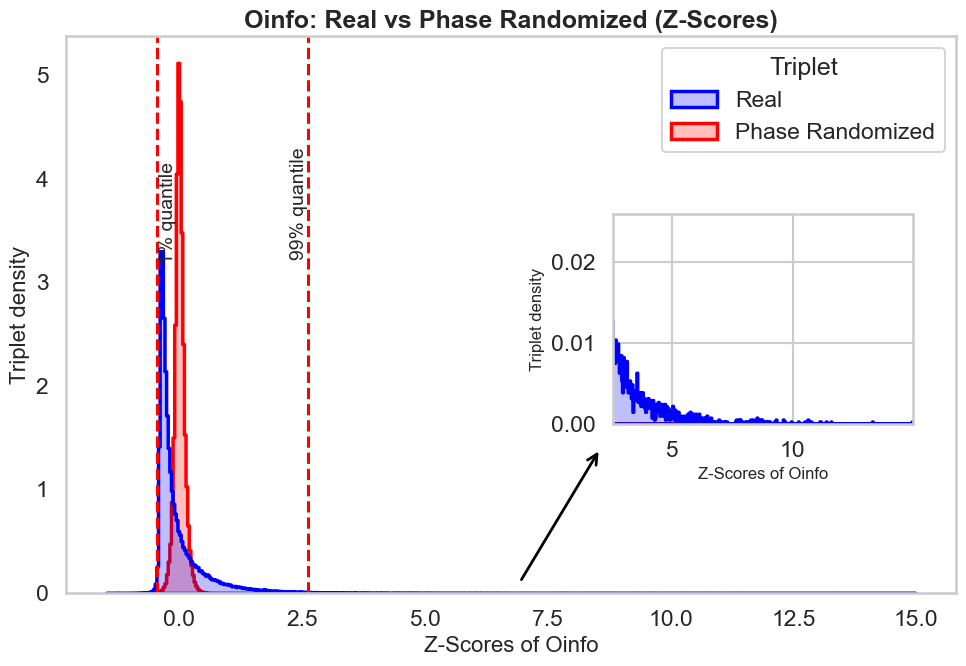

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have DataFrames named average_df and average_df_random

# Combine the two DataFrames and add a 'Triplet' column to distinguish between them
average_df['Triplet'] = 'Real'
average_df_random['Triplet'] = 'Phase Randomized'
combined_df = pd.concat([average_df, average_df_random])

# Plot styling
sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(10, 7))

# Main plot
sns.histplot(data=combined_df, x='Oinfo_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax, bins=500, palette={"Phase Randomized": "red", "Real": "blue"})
ax.set_title('Oinfo: Real vs Phase Randomized (Z-Scores)', fontsize=18, weight='bold')
ax.set_xlabel('Z-Scores of Oinfo', fontsize=16)
ax.set_ylabel('Triplet density', fontsize=16)

# Remove the grid
ax.grid(False)

# Quantile lines for 'Real' only
q1 = average_df['Oinfo_zscore'].quantile(0.01)
q99 = average_df['Oinfo_zscore'].quantile(0.99)
ax.axvline(q1, color='red', linestyle='dashed', linewidth=2.2)
ax.axvline(q99, color='red', linestyle='dashed', linewidth=2.2)
ax.annotate('1% quantile', xy=(q1, 0.02), xytext=(0.92*q1, 0.775*ax.get_ylim()[1]), horizontalalignment='left', verticalalignment='top', rotation=90, fontsize=14)
ax.annotate('99% quantile', xy=(q99, 0.02), xytext=(q99, 0.8*ax.get_ylim()[1]), horizontalalignment='right', verticalalignment='top', rotation=90, fontsize=14)

# Inset axes with data from the entire dataset (for the same column)
ax_inset = fig.add_axes([0.63, 0.37, 0.3, 0.3])
sns.histplot(data=combined_df, x='Oinfo_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax_inset, bins=500, legend=False, palette={"Phase Randomized": "red", "Real": "blue"})

# Set the y-axis limit in the inset to match the density of the full column
density_max = max(average_df['Oinfo_zscore'].max(), average_df_random['Mut Info_zscore'].max())
ax_inset.set_ylim(0, 0.026)

ax_inset.set_xlim(0.98*q99, density_max)
ax_inset.set_xlabel('Z-Scores of Oinfo', fontsize=12)
ax_inset.set_ylabel('Triplet density', fontsize=12)

# Draw an arrow from the main plot to the inset
arrow_start = (0.52, 0.12)
arrow_end = (0.6, 0.31)
ax.annotate('', xy=arrow_end, xycoords='figure fraction', xytext=arrow_start, textcoords='figure fraction',
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

#ax.tick_params(axis='y', labelsize=12)  # Adjust 'labelsize' as needed for the desired font size
#ax_inset.tick_params(axis='y', labelsize=10)  # Adjust 'labelsize' as needed for the desired font size
#ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust 'nbins' for the number of desired y-labels
#ax_inset.yaxis.set_major_locator(plt.MaxNLocator(nbins=3))  # Adjust 'nbins' for the number of desired y-labels

# Save and show plot
plt.tight_layout()
plt.savefig('real_vs_random_zscores_o_info.png', dpi=300, bbox_inches='tight')
plt.show()


<ipython-input-17-88c483e47d1a>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


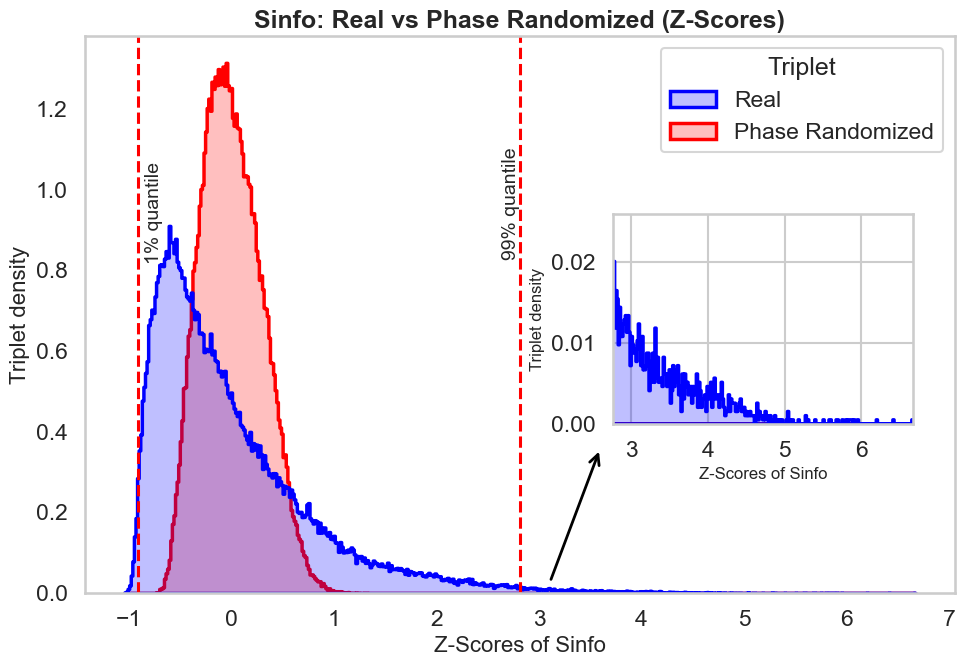

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have DataFrames named average_df and average_df_random

# Combine the two DataFrames and add a 'Triplet' column to distinguish between them
average_df['Triplet'] = 'Real'
average_df_random['Triplet'] = 'Phase Randomized'
combined_df = pd.concat([average_df, average_df_random])

# Plot styling
sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(10, 7))

# Main plot
sns.histplot(data=combined_df, x='Sinfo_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax, bins=500, palette={"Phase Randomized": "red", "Real": "blue"})
ax.set_title('Sinfo: Real vs Phase Randomized (Z-Scores)', fontsize=18, weight='bold')
ax.set_xlabel('Z-Scores of Sinfo', fontsize=16)
ax.set_ylabel('Triplet density', fontsize=16)

# Remove the grid
ax.grid(False)

# Quantile lines for 'Real' only
q1 = average_df['Sinfo_zscore'].quantile(0.01)
q99 = average_df['Sinfo_zscore'].quantile(0.99)
ax.axvline(q1, color='red', linestyle='dashed', linewidth=2.2)
ax.axvline(q99, color='red', linestyle='dashed', linewidth=2.2)
ax.annotate('1% quantile', xy=(q1, 0.02), xytext=(0.92*q1, 0.775*ax.get_ylim()[1]), horizontalalignment='left', verticalalignment='top', rotation=90, fontsize=14)
ax.annotate('99% quantile', xy=(q99, 0.02), xytext=(q99, 0.8*ax.get_ylim()[1]), horizontalalignment='right', verticalalignment='top', rotation=90, fontsize=14)

# Inset axes with data from the entire dataset (for the same column)
ax_inset = fig.add_axes([0.63, 0.37, 0.3, 0.3])
sns.histplot(data=combined_df, x='Sinfo_zscore', hue='Triplet', element='step', stat='density', common_norm=False, kde=False, linewidth=2.5, ax=ax_inset, bins=500, legend=False, palette={"Phase Randomized": "red", "Real": "blue"})

# Set the y-axis limit in the inset to match the density of the full column
density_max = max(average_df['Sinfo_zscore'].max(), average_df_random['Mut Info_zscore'].max())
ax_inset.set_ylim(0, 0.026)

ax_inset.set_xlim(0.98*q99, density_max)
ax_inset.set_xlabel('Z-Scores of Sinfo', fontsize=12)
ax_inset.set_ylabel('Triplet density', fontsize=12)

# Draw an arrow from the main plot to the inset
arrow_start = (0.55, 0.12)
arrow_end = (0.6, 0.31)
ax.annotate('', xy=arrow_end, xycoords='figure fraction', xytext=arrow_start, textcoords='figure fraction',
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

#ax.tick_params(axis='y', labelsize=12)  # Adjust 'labelsize' as needed for the desired font size
#ax_inset.tick_params(axis='y', labelsize=10)  # Adjust 'labelsize' as needed for the desired font size
#ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust 'nbins' for the number of desired y-labels
#ax_inset.yaxis.set_major_locator(plt.MaxNLocator(nbins=3))  # Adjust 'nbins' for the number of desired y-labels

# Save and show plot
plt.tight_layout()
plt.savefig('real_vs_random_zscores_s_info.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
import numpy as np

# Choose a specific column from the real DataFrame
chosen_column = 'Total Corr'

# Get the values of the chosen column from the real data and the surrogate
real_column_values = average_df[chosen_column].values
surrogate_column_values = average_df_random[chosen_column].values

# Compute the lower and upper bounds using the surrogate data
lower_bound = np.percentile(surrogate_column_values, 2.5)
upper_bound = np.percentile(surrogate_column_values, 97.5)

# Create a boolean mask indicating which triplets are significant
is_significant = (real_column_values > upper_bound)

# Get the significant triplets from the real data
significant_triplets = average_df[is_significant]


In [20]:
significant_triplets

,Joint Ent,Mut Info,Total Corr,Oinfo,Sinfo,Joint Ent_zscore,Mut Info_zscore,Total Corr_zscore,Oinfo_zscore,Sinfo_zscore,nplets,Triplet
91,8.701489,-0.404024,1.464731,0.047285,0.795621,-1.342918,1.237249,0.663595,1.266226,1.579697,"[1, 3, 5]",Real
185,8.862129,-0.474027,1.454542,0.045319,0.646959,-0.572133,0.759952,0.603460,1.091305,1.056169,"[1, 4, 11]",Real
194,9.026174,-0.577560,1.424098,0.017145,0.498216,0.077023,0.058802,0.454384,0.168021,0.547819,"[1, 4, 20]",Real
214,8.805634,-0.411523,1.450316,0.075858,0.670930,-0.857102,1.181844,0.572029,2.116371,1.089635,"[1, 4, 40]",Real
217,8.702541,-0.354220,1.577823,0.080648,0.948896,-1.283575,1.520145,1.220238,2.036182,2.029352,"[1, 4, 43]",Real
...,...,...,...,...,...,...,...,...,...,...,...,...
124287,8.959059,-0.524811,1.411946,0.033779,0.510205,-0.189981,0.306175,0.293349,0.319568,0.406576,"[72, 75, 76]",Real
124289,8.964756,-0.511395,1.430159,0.043824,0.533701,-0.179333,0.355127,0.332812,0.458873,0.403353,"[72, 75, 78]",Real
124305,8.883271,-0.450410,1.460483,0.055900,0.632697,-0.565117,0.784643,0.485508,0.820137,0.755372,"[72, 76, 78]",Real
124764,8.986624,-0.533926,1.410651,0.027197,0.518461,-0.127234,0.286363,0.311449,0.346974,0.493933,"[75, 76, 77]",Real
